**Simple Linear Regression** is a type of regression algorithm that models the relationship betweem a dependent variable and a single independent variable shown by a Simple Linear Regression model is linear or a sloped straight line, hence it is called Simple Linear Regression

**Implementation os Simple Linear Regression**

**Problem Statement -** We are taking a dataset that has two variable: Salary [dependent variable] and Experience [Independent variable].

The goal of this problem is:

* We want to find out if there is any correlation between these two variable.
* We will find the best fit line for the dataset.
* How the dependent variable is changing by changing the independent variable. 

In [4]:
#Importing Basics libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Step 1** - Data loading

In [6]:
data = pd.read_excel(r"C:\Users\lenovo\Downloads\Salary.xlsx")
data

,Experience,Salary
0,1.0,34000
1,1.5,35900
2,1.6,34000
3,2.0,42579
4,1.7,33990
5,1.5,34000
6,2.2,43000
7,2.7,42500
8,1.1,30000
9,2.9,45900


In [7]:
data.describe()

,Experience,Salary
count,22.000000,22.000000
mean,2.481818,41820.409091
std,1.147932,8594.095363
min,1.000000,30000.000000
25%,1.600000,34000.000000
50%,2.100000,42539.500000
75%,3.450000,48725.000000
max,4.900000,60000.000000


In [8]:
data.shape

(22, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  22 non-null     float64
 1   Salary      22 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 484.0 bytes


In [10]:
data.isnull().sum()

Experience    0
Salary        0
dtype: int64

As per the above observations we can see that both the variables are numeric in nature which means the data is in proper format. We can also obser columns/features do not have any missing values.

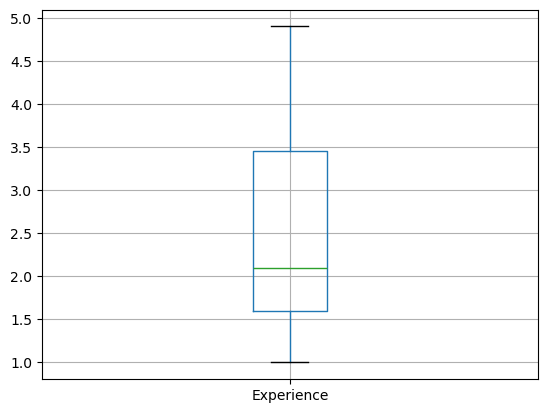

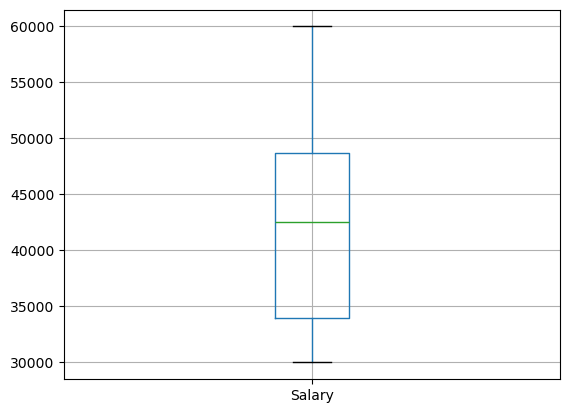

In [12]:
#Assumtion 1: There should be no outliers in the data.
#Check using boxplot.

for i in data.columns:
    data.boxplot(column = i)
    plt.show()

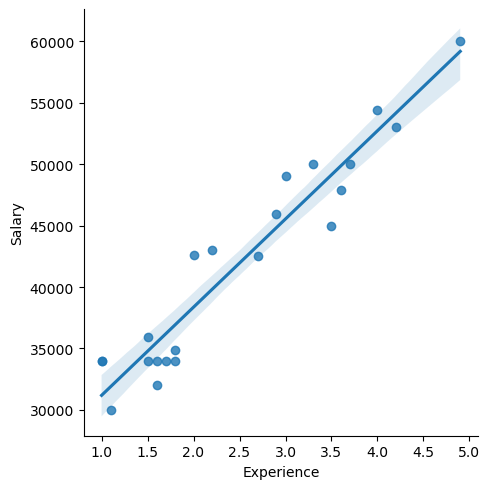

In [13]:
#Assumption 2: Assumption of linearity: Every independent variable should have a Linear relationship with the dep var. 

sns.lmplot(data=data, x="Experience", y="Salary")
plt.show();

#Either positive or negative but there should be some relation in every indeendent variable with dep variable.

As we can observe that my ind feature Experience shows a positive linear relation with dependent feature Salary, so the assumption of linearity is satisfied.

**Step 4:** Data Splitting

In [16]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [17]:
y

array([34000, 35900, 34000, 42579, 33990, 34000, 43000, 42500, 30000,
       45900, 34900, 32000, 34000, 34000, 49000, 50000, 49990, 54390,
       53000, 45000, 47900, 60000], dtype=int64)

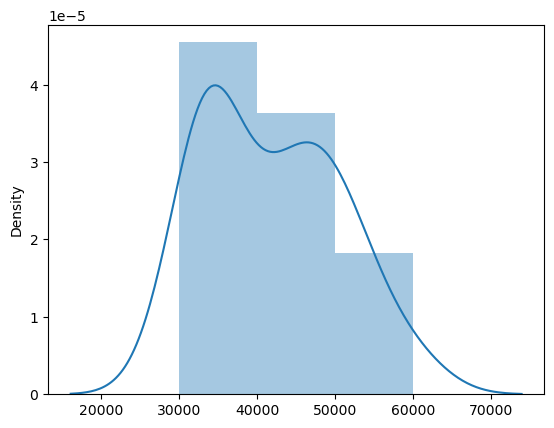

In [18]:
#3rd Assumption: Assumption of Normality: The dependent variable should follow on approximate normal distribution.

sns.distplot(y)
plt.show()

In [19]:
#Splitting the dataset into training and test set.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size = 1/3, random_state=0)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(14, 1)
(8, 1)
(14,)
(8, 1)


In [21]:
# Fitting the Simple Linear Regression model to the traning dataset

from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(x_train, y_train)

#print intercept and coefficientss

print(lm.intercept_)
print(lm.coef_)

24892.03664235489
[7077.8263528]


In [22]:
#Prediction of test and training set result

y_pred = lm.predict(x_test)
x_pred = lm.predict(x_train)

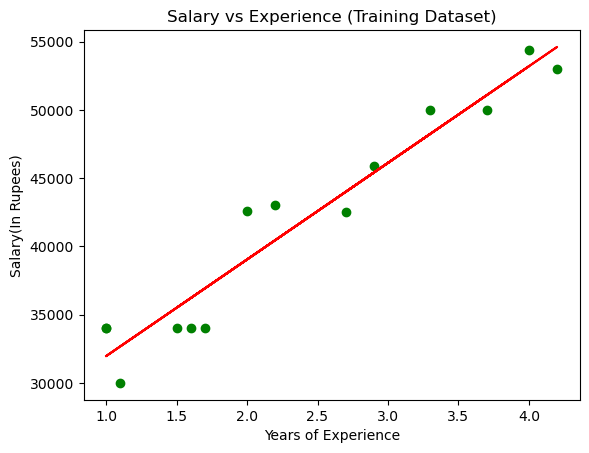

In [23]:
plt.scatter(x_train, y_train, color="green")
plt.plot(x_train, x_pred, color="red")
plt.title("Salary vs Experience (Training Dataset)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary(In Rupees)")
plt.show()

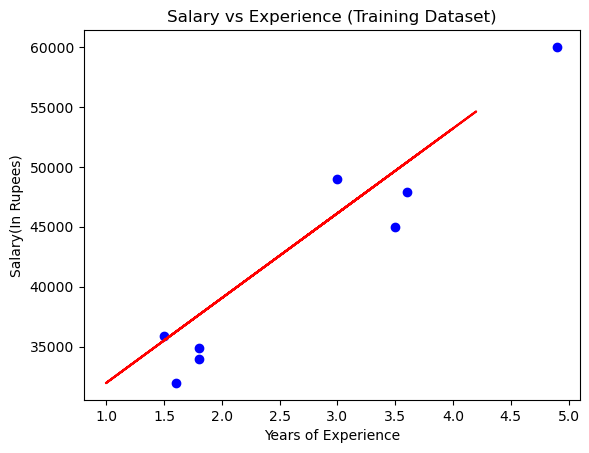

In [24]:
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_train, x_pred, color="red")
plt.title("Salary vs Experience (Training Dataset)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary(In Rupees)")
plt.show()

In [25]:
import pandas as pd

result_df = pd.DataFrame({'Experience':x_test.squeeze(),'Actual Salary': y_test, 'Predicted Salary': y_pred})
result_df

,Experience,Actual Salary,Predicted Salary
0,3.6,47900,50372.211512
1,1.8,34900,37632.124077
2,3.0,49000,46125.515701
3,1.8,34000,37632.124077
4,1.5,35900,35508.776172
5,4.9,60000,59573.385771
6,1.6,32000,36216.558807
7,3.5,45000,49664.428877


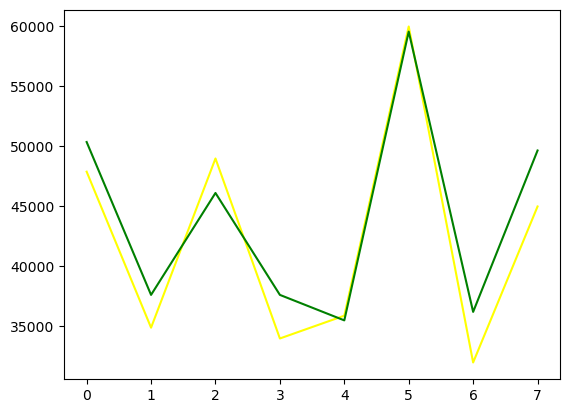

In [26]:
result_df["Actual Salary"].plot(color="yellow")
result_df["Predicted Salary"].plot(color="green")
plt.show()

In [27]:
result_df["Residual"]=result_df["Actual Salary"]-result_df["Predicted Salary"]
result_df

,Experience,Actual Salary,Predicted Salary,Residual
0,3.6,47900,50372.211512,-2472.211512
1,1.8,34900,37632.124077,-2732.124077
2,3.0,49000,46125.515701,2874.484299
3,1.8,34000,37632.124077,-3632.124077
4,1.5,35900,35508.776172,391.223828
5,4.9,60000,59573.385771,426.614229
6,1.6,32000,36216.558807,-4216.558807
7,3.5,45000,49664.428877,-4664.428877


In [49]:
test = pd.read_excel(r"C:\Users\lenovo\Downloads\drive-download-20241117T104241Z-001\Testing.xlsx")
test

,Experience
0,2.0
1,1.3
2,1.0
3,1.5
4,2.5
5,3.0
6,2.0


In [53]:
Y_unseen = lm.predict(test)
Y_unseen

array([39047.68934795, 34093.21090099, 31969.86299515, 35508.77617155,
       42586.60252435, 46125.51570075, 39047.68934795])

In [57]:
Y_upd = pd.Series(Y_unseen)
Y_upd

0    39047.689348
1    34093.210901
2    31969.862995
3    35508.776172
4    42586.602524
5    46125.515701
6    39047.689348
dtype: float64

In [59]:
test["Salary Pred"] = Y_upd
test

,Experience,Salary Pred
0,2.0,39047.689348
1,1.3,34093.210901
2,1.0,31969.862995
3,1.5,35508.776172
4,2.5,42586.602524
5,3.0,46125.515701
6,2.0,39047.689348


### **Evaluation Metrics** ###  

It will help to evaluate/understand the performance of model how good or bad the predictions were.  

For Regression - R2, Adj.R2, RMSE, AIC/BIC, MAE, MSE.